<a href="https://colab.research.google.com/github/vineethr2004/Laptop_price_prediction_Decision_Trees/blob/main/Laptop_price_prediction_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv("laptop_price.csv",encoding="latin-1")

In [8]:
df=df.drop("Product",axis=1)

In [ ]:
df=df.join(pd.get_dummies(df.Company))
df.drop("Company",axis=1)

In [10]:
df=df.join(pd.get_dummies(df.TypeName))
df=df.drop("TypeName",axis=1)

In [11]:
df["ScreenResolution"]=df.ScreenResolution.str.split(" ").apply(lambda x:x[-1])
df["Screen Width"]=df.ScreenResolution.str.split("x").apply(lambda x:x[0])
df["Screen Height"]=df.ScreenResolution.str.split("x").apply(lambda x:x[1])

In [12]:
df=df.drop("ScreenResolution",axis=1)

In [13]:
df["Cpu Brand"]=df.Cpu.str.split(" ").apply(lambda x:x[0])
df["Cpu Frequency"]=df.Cpu.str.split(" ").apply(lambda x:x[-1])

In [14]:
df=df.drop("Cpu",axis=1)

In [15]:
df["Cpu Frequency"]=df["Cpu Frequency"].str[:-3]

In [16]:
df["Ram"]=df["Ram"].str[:-2]

In [17]:
df["Ram"]=df["Ram"].astype("int")
df["Cpu Frequency"]=df["Cpu Frequency"].astype("float")

In [18]:
df["Screen Width"]=df["Screen Width"].astype("int")
df["Screen Height"]=df["Screen Height"].astype("int")

In [19]:
df["Memory Amount"]=df["Memory"].str.split(" ").apply(lambda x:x[0])
df["Memory Type"]=df["Memory"].str.split(" ").apply(lambda x:x[1])

In [ ]:
df["Memory Amount"].value_counts()

In [21]:
def turn_memory_into_mb(value):
  if "GB" in value:
    return float(value[:value.find("GB")])*1000
  elif "TB" in value:
    return float(value[:value.find("TB")])*1000000

In [22]:
df["Memory Amount"]=df["Memory Amount"].apply(turn_memory_into_mb)

In [23]:
df=df.drop("Memory",axis=1)

In [24]:
df["Weight"]=df["Weight"].str[:-2]

In [25]:
df["Weight"]=df["Weight"].astype("float")

In [26]:
df["Gpu Brand"]=df.Gpu.str.split(" ").apply(lambda x :x[0])

In [ ]:
df.drop("Gpu",axis=1)

In [28]:
df=df.join(pd.get_dummies(df.OpSys))

In [29]:
df=df.drop("Gpu",axis=1)
df=df.drop("OpSys",axis=1)

In [ ]:
df.columns

In [37]:
df=df.drop("Company",axis=1)

In [40]:
Cpu_categ=pd.get_dummies(df["Cpu Brand"])
Cpu_categ.columns=[col + "_Cpu" for col in Cpu_categ.columns]

In [42]:
df=df.join(Cpu_categ)
df=df.drop("Cpu Brand",axis=1)

In [44]:
gpu_categ=pd.get_dummies(df["Gpu Brand"])
gpu_categ.columns=[col + "_Gpu" for col in gpu_categ.columns]

In [45]:
df=df.join(gpu_categ)
df=df.drop("Gpu Brand",axis=1)

<Axes: >

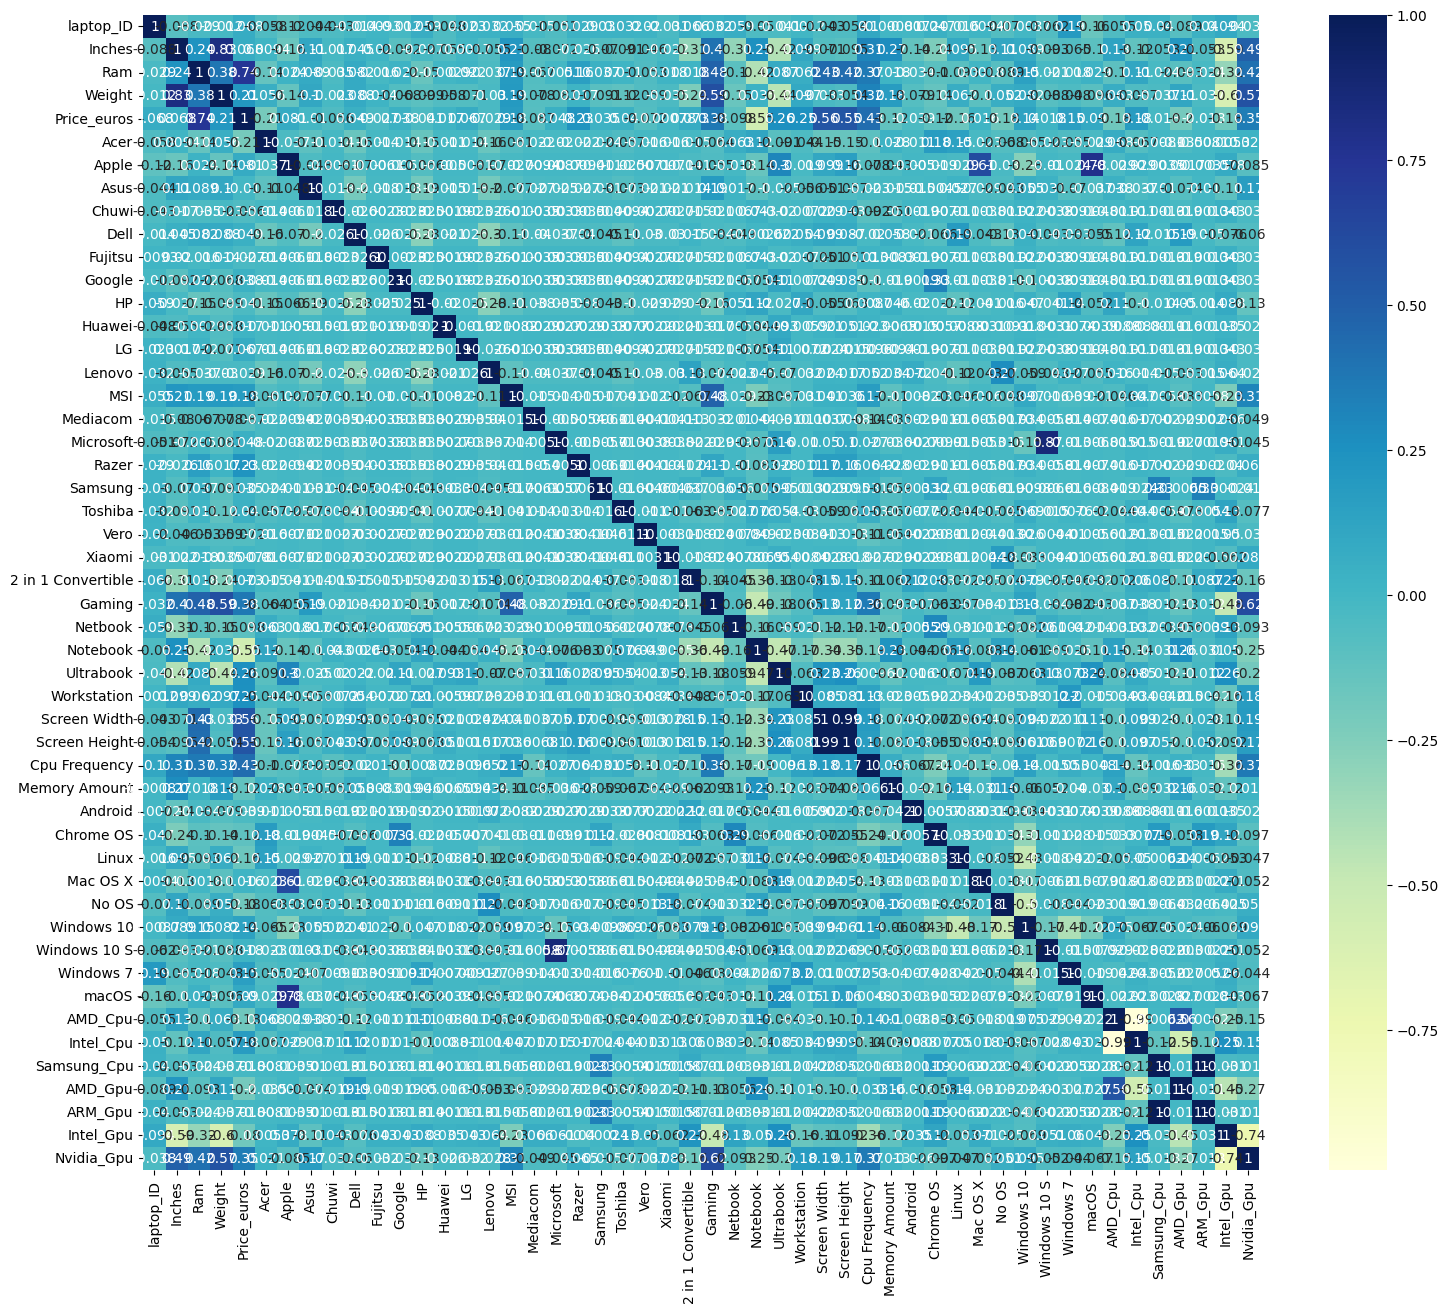

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [52]:
target_correlation=df.corr()["Price_euros"].apply(abs).sort_values()

In [53]:
target_correlation

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_Gpu               0.018431
Samsung_Cpu           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [54]:
selected_features=target_correlation[-21:].index

In [56]:
selected_features=list(selected_features)
selected_features

['Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_Cpu',
 'Intel_Cpu',
 'Intel_Gpu',
 'AMD_Gpu',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_Gpu',
 'Gaming',
 'Cpu Frequency',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [58]:
limited_df=df[selected_features]
limited_df

,Windows 7,Linux,No OS,MSI,AMD_Cpu,Intel_Cpu,Intel_Gpu,AMD_Gpu,Acer,Weight,...,Workstation,Ultrabook,Nvidia_Gpu,Gaming,Cpu Frequency,Notebook,Screen Height,Screen Width,Ram,Price_euros
0,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,2.3,0,1600,2560,8,1339.69
1,0,0,0,0,0,1,1,0,0,1.34,...,0,1,0,0,1.8,0,900,1440,8,898.94
2,0,0,1,0,0,1,1,0,0,1.86,...,0,0,0,0,2.5,1,1080,1920,8,575.00
3,0,0,0,0,0,1,0,1,0,1.83,...,0,1,0,0,2.7,0,1800,2880,16,2537.45
4,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,3.1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,1,0,0,1.80,...,0,0,0,0,2.5,0,1080,1920,4,638.00
1299,0,0,0,0,0,1,1,0,0,1.30,...,0,0,0,0,2.5,0,1800,3200,16,1499.00
1300,0,0,0,0,0,1,1,0,0,1.50,...,0,0,0,0,1.6,1,768,1366,2,229.00
1301,0,0,0,0,0,1,0,1,0,2.19,...,0,0,0,0,2.5,1,768,1366,6,764.00


<Axes: >

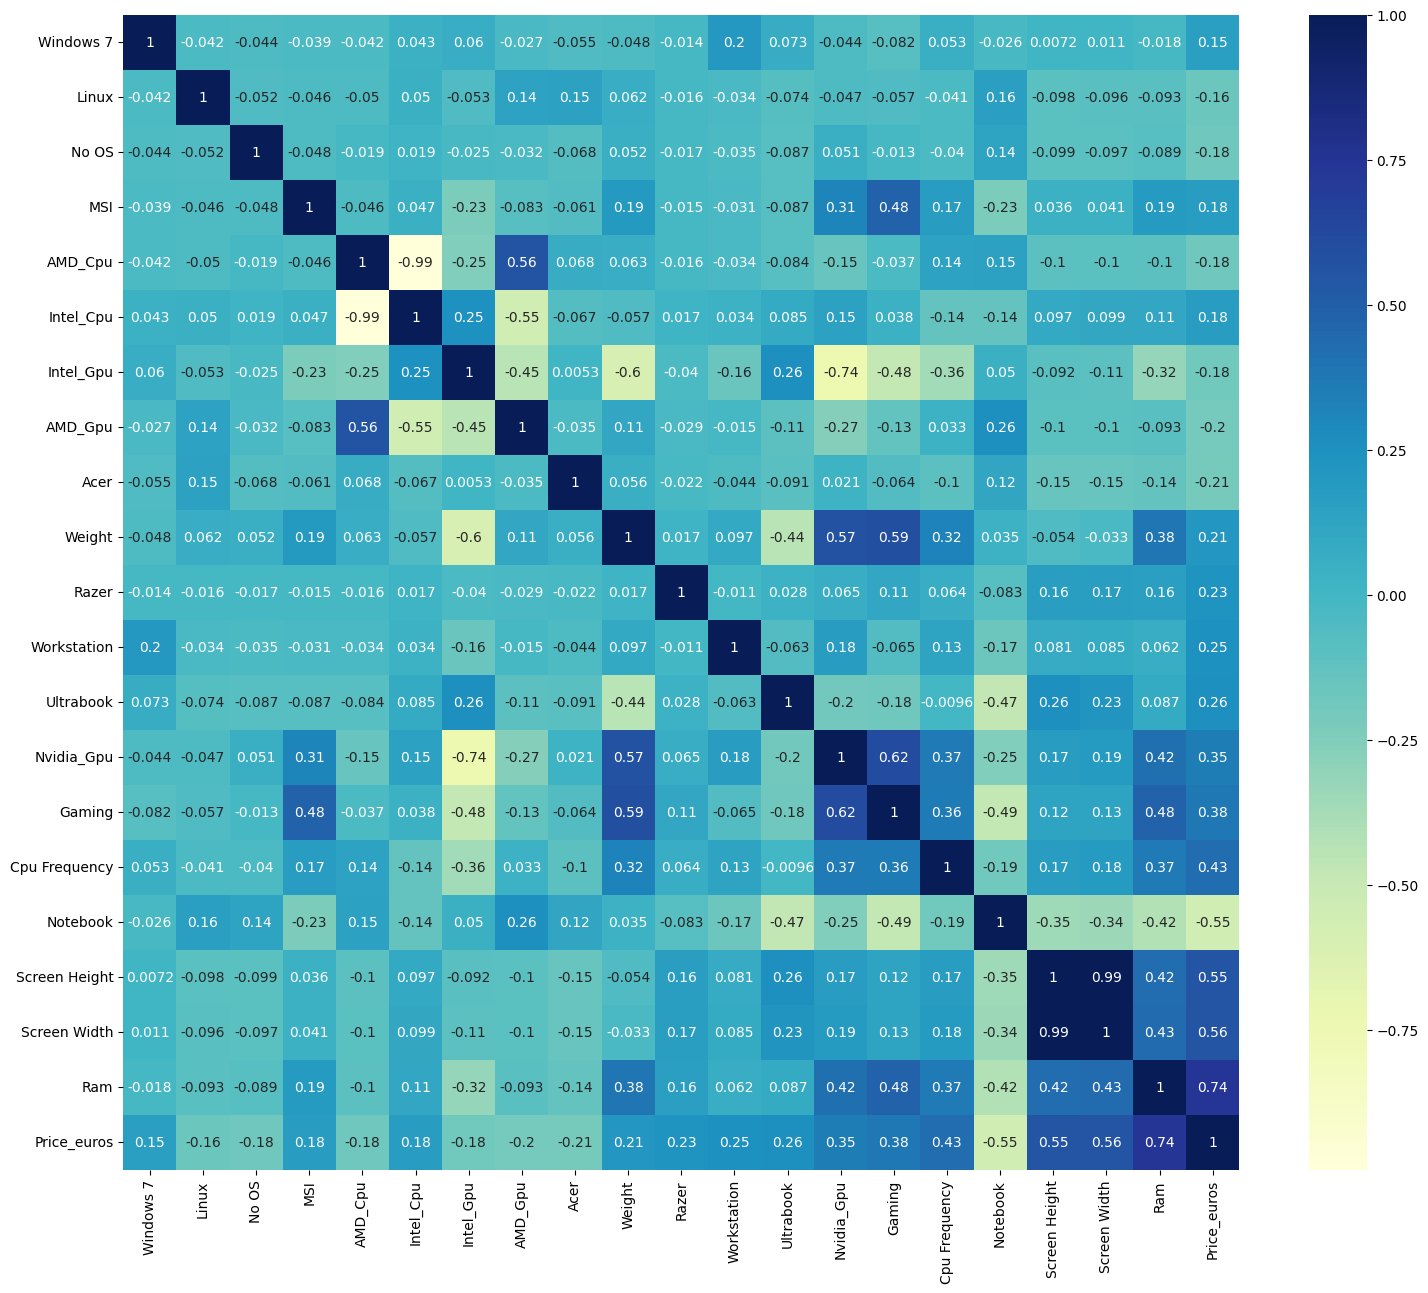

In [61]:
plt.figure(figsize=(18,15))
sns.heatmap(limited_df.corr(),annot=True,cmap="YlGnBu")

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y = limited_df.drop("Price_euros",axis=1), limited_df["Price_euros"]
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)

scaler = StandardScaler()

X_Train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)



In [65]:
forest=RandomForestRegressor()
forest.fit(X_Train_scaled,y_train)

RandomForestRegressor()

In [66]:
forest.score(X_test_scaled,y_test)

0.7818805767664732

In [67]:
y_pred=forest.predict(X_test_scaled)

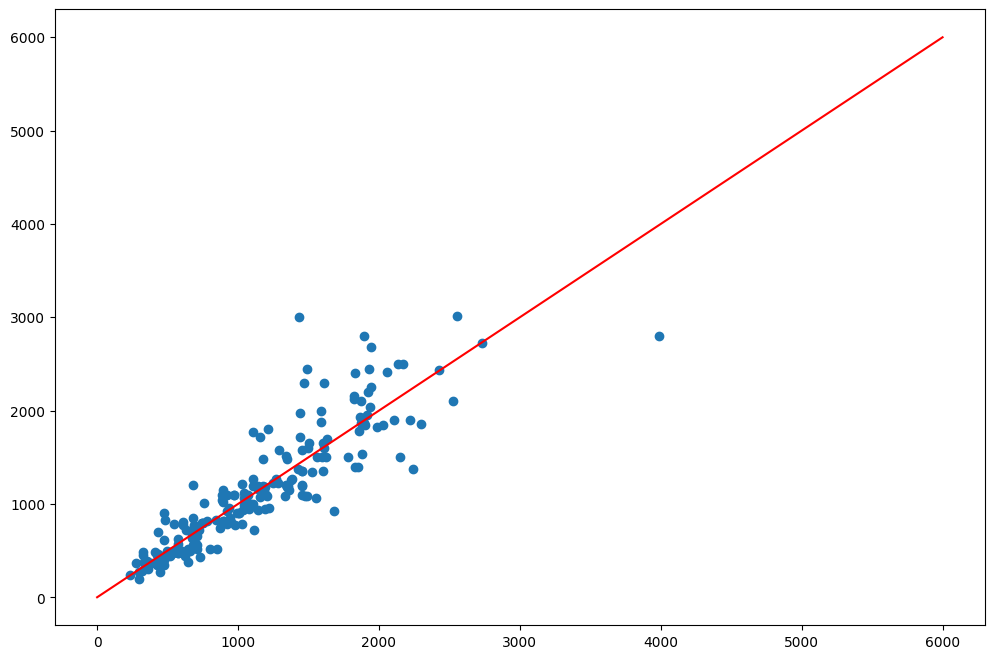

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred,y_test)
plt.plot(range(0,6000),range(0,6000),c="red")